In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
import statsmodels.api as sm

# Question 1 :

In [2]:
df = pd.read_excel('/media/abhishek/589E61B39E618A782/C-DAC Document/Advanced Analytics/Assignment/Datasets/Closing Stock Prices.xlsx', skiprows = 2)

/home/abhishek/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df

,Date,IBM,INTC,CSCO,GE,DJ Industrials \nIndex
0,2010-09-03,127.58,18.430,21.040,15.392,10447.93
1,2010-09-07,125.95,18.120,20.580,15.440,10340.69
2,2010-09-08,126.08,17.900,20.640,15.700,10387.01
3,2010-09-09,126.36,18.000,20.610,15.910,10415.24
4,2010-09-10,127.99,17.970,20.620,15.980,10462.77
5,2010-09-13,129.61,18.557,21.260,16.250,10544.13
6,2010-09-14,128.85,18.740,21.450,16.160,10526.49
7,2010-09-15,129.43,18.720,21.590,16.340,10572.73
8,2010-09-16,129.67,18.970,21.930,16.230,10594.83
9,2010-09-17,130.19,18.810,21.863,16.290,10607.85


## 1st Part :

 ### MovingAverages 

In [4]:
df["ma_4"] = df["IBM"].rolling(window = 1).mean().shift(1)
df["ma_5"] = df["INTC"].rolling(window = 1).mean().shift(1)
df["ma_6"] = df["CSCO"].rolling(window = 1).mean().shift(1)

In [5]:
df

,Date,IBM,INTC,CSCO,GE,DJ Industrials \nIndex,ma_4,ma_5,ma_6
0,2010-09-03,127.58,18.430,21.040,15.392,10447.93,NaN,NaN,NaN
1,2010-09-07,125.95,18.120,20.580,15.440,10340.69,127.58,18.430,21.040
2,2010-09-08,126.08,17.900,20.640,15.700,10387.01,125.95,18.120,20.580
3,2010-09-09,126.36,18.000,20.610,15.910,10415.24,126.08,17.900,20.640
4,2010-09-10,127.99,17.970,20.620,15.980,10462.77,126.36,18.000,20.610
5,2010-09-13,129.61,18.557,21.260,16.250,10544.13,127.99,17.970,20.620
6,2010-09-14,128.85,18.740,21.450,16.160,10526.49,129.61,18.557,21.260
7,2010-09-15,129.43,18.720,21.590,16.340,10572.73,128.85,18.740,21.450
8,2010-09-16,129.67,18.970,21.930,16.230,10594.83,129.43,18.720,21.590
9,2010-09-17,130.19,18.810,21.863,16.290,10607.85,129.67,18.970,21.930


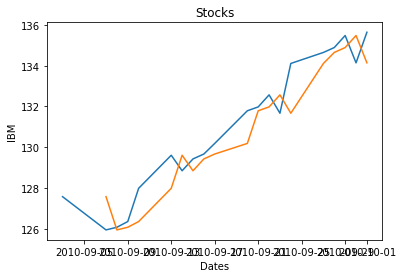

In [6]:
plt.plot(df[df.columns[0]], df[df.columns[1]])
plt.plot(df[df.columns[0]], df[df.columns[6]])
plt.xlabel("Dates")
plt.ylabel("IBM")
plt.title("Stocks")
plt.show()

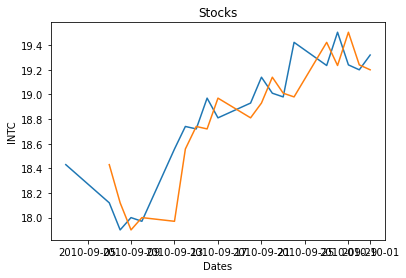

In [7]:
plt.plot(df[df.columns[0]], df[df.columns[2]])
plt.plot(df[df.columns[0]], df[df.columns[7]])
plt.xlabel("Dates")
plt.ylabel("INTC")
plt.title("Stocks")
plt.show()

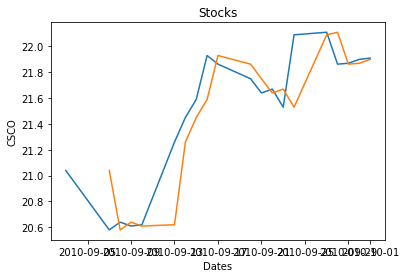

In [8]:
plt.plot(df[df.columns[0]], df[df.columns[3]])
plt.plot(df[df.columns[0]], df[df.columns[8]])
plt.xlabel("Dates")
plt.ylabel("CSCO")
plt.title("Stocks")
plt.show()

### Exponential Smoothing :

In [9]:
df = pd.read_excel('/media/abhishek/589E61B39E618A782/C-DAC Document/Advanced Analytics/Assignment/Datasets/Closing Stock Prices.xlsx', skiprows = 2)

/home/abhishek/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [10]:
df

,Date,IBM,INTC,CSCO,GE,DJ Industrials \nIndex
0,2010-09-03,127.58,18.430,21.040,15.392,10447.93
1,2010-09-07,125.95,18.120,20.580,15.440,10340.69
2,2010-09-08,126.08,17.900,20.640,15.700,10387.01
3,2010-09-09,126.36,18.000,20.610,15.910,10415.24
4,2010-09-10,127.99,17.970,20.620,15.980,10462.77
5,2010-09-13,129.61,18.557,21.260,16.250,10544.13
6,2010-09-14,128.85,18.740,21.450,16.160,10526.49
7,2010-09-15,129.43,18.720,21.590,16.340,10572.73
8,2010-09-16,129.67,18.970,21.930,16.230,10594.83
9,2010-09-17,130.19,18.810,21.863,16.290,10607.85


In [11]:
df["es_op1"] = df["IBM"].ewm(alpha = 0.2).mean()
df["es_op2"] = df["INTC"].ewm(alpha = 0.2).mean()
df["es_op3"] = df["CSCO"].ewm(alpha = 0.2).mean()

In [12]:
df

,Date,IBM,INTC,CSCO,GE,DJ Industrials \nIndex,es_op1,es_op2,es_op3
0,2010-09-03,127.58,18.430,21.040,15.392,10447.93,127.580000,18.430000,21.040000
1,2010-09-07,125.95,18.120,20.580,15.440,10340.69,126.674444,18.257778,20.784444
2,2010-09-08,126.08,17.900,20.640,15.700,10387.01,126.430820,18.111148,20.725246
3,2010-09-09,126.36,18.000,20.610,15.910,10415.24,126.406829,18.073496,20.686206
4,2010-09-10,127.99,17.970,20.620,15.980,10462.77,126.877787,18.042708,20.666511
5,2010-09-13,129.61,18.557,21.260,16.250,10544.13,127.618368,18.182110,20.827380
6,2010-09-14,128.85,18.740,21.450,16.160,10526.49,127.930062,18.323297,20.984948
7,2010-09-15,129.43,18.720,21.590,16.340,10572.73,128.290525,18.418632,21.130354
8,2010-09-16,129.67,18.970,21.930,16.230,10594.83,128.609191,18.546001,21.315076
9,2010-09-17,130.19,18.810,21.863,16.290,10607.85,128.963384,18.605152,21.437843


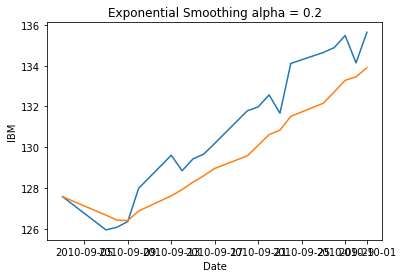

In [13]:
plt.plot(df[df.columns[0]],df[df.columns[1]])
plt.plot(df[df.columns[0]],df[df.columns[6]])
plt.xlabel("Date")
plt.ylabel("IBM")
plt.title("Exponential Smoothing alpha = 0.2")
plt.show()

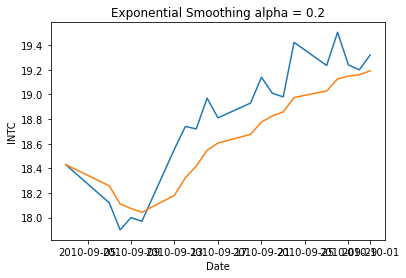

In [14]:
plt.plot(df[df.columns[0]],df[df.columns[2]])
plt.plot(df[df.columns[0]],df[df.columns[7]])
plt.xlabel("Date")
plt.ylabel("INTC")
plt.title("Exponential Smoothing alpha = 0.2")
plt.show()

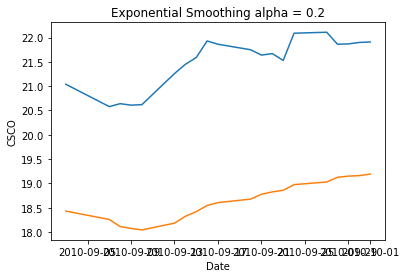

In [15]:
plt.plot(df[df.columns[0]],df[df.columns[3]])
plt.plot(df[df.columns[0]],df[df.columns[7]])
plt.xlabel("Date")
plt.ylabel("CSCO")
plt.title("Exponential Smoothing alpha = 0.2")
plt.show()

## 2nd Part :

In [16]:
df = pd.read_excel('/media/abhishek/589E61B39E618A782/C-DAC Document/Advanced Analytics/Assignment/Datasets/Closing Stock Prices.xlsx', skiprows = 2)

/home/abhishek/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [17]:
df["ma_4"] = df["IBM"].rolling(window = 1).mean().shift(1)
df["ma_5"] = df["INTC"].rolling(window = 1).mean().shift(1)
df["ma_6"] = df["CSCO"].rolling(window = 1).mean().shift(1)

In [18]:
df

,Date,IBM,INTC,CSCO,GE,DJ Industrials \nIndex,ma_4,ma_5,ma_6
0,2010-09-03,127.58,18.430,21.040,15.392,10447.93,NaN,NaN,NaN
1,2010-09-07,125.95,18.120,20.580,15.440,10340.69,127.58,18.430,21.040
2,2010-09-08,126.08,17.900,20.640,15.700,10387.01,125.95,18.120,20.580
3,2010-09-09,126.36,18.000,20.610,15.910,10415.24,126.08,17.900,20.640
4,2010-09-10,127.99,17.970,20.620,15.980,10462.77,126.36,18.000,20.610
5,2010-09-13,129.61,18.557,21.260,16.250,10544.13,127.99,17.970,20.620
6,2010-09-14,128.85,18.740,21.450,16.160,10526.49,129.61,18.557,21.260
7,2010-09-15,129.43,18.720,21.590,16.340,10572.73,128.85,18.740,21.450
8,2010-09-16,129.67,18.970,21.930,16.230,10594.83,129.43,18.720,21.590
9,2010-09-17,130.19,18.810,21.863,16.290,10607.85,129.67,18.970,21.930


### * Using MAD ~

#### IBM

In [19]:
df = df.dropna(how = "any")

In [20]:
mean_squared_error(df["IBM"], df["ma_4"])

1.2487473684210626

#### INTC

In [21]:
df = df.dropna(how = "any")

In [22]:
mean_squared_error(df["INTC"], df["ma_5"])

0.05731452631578939

#### CSCO

In [23]:
df = df.dropna(how = "any")

In [24]:
mean_squared_error(df["CSCO"], df["ma_6"])

0.06436926315789471

### * Using MSE ~

#### IBM

In [25]:
mean_squared_error(df["IBM"], df["ma_4"], squared = True)

1.2487473684210626

#### INTC 

In [26]:
mean_squared_error(df["INTC"], df["ma_5"], squared = True)

0.05731452631578939

#### CSCO

In [27]:
mean_squared_error(df["CSCO"], df["ma_6"], squared = True)

0.06436926315789471

# Question 2 :
'''Use simple linear
regression to forecast the data. What would be the forecasts for the next 3
years?'''

In [28]:
df2 = pd.read_excel('/media/abhishek/589E61B39E618A782/C-DAC Document/Advanced Analytics/Assignment/Datasets/Nuclear Power.xlsx', skiprows = 2)

/home/abhishek/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [29]:
df2

,Year,US,Canada,France,Unnamed: 4
0,1980,251.12,35.88,63.42,NaN
1,1981,272.67,37.80,99.24,NaN
2,1982,282.77,36.17,102.63,NaN
3,1983,293.68,46.22,135.99,NaN
4,1984,327.63,49.26,180.47,NaN
5,1985,383.69,57.10,211.19,NaN
6,1986,414.04,67.23,239.56,NaN
7,1987,455.27,72.89,249.27,NaN
8,1988,526.97,78.18,260.29,NaN
9,1989,529.35,75.35,288.72,NaN


## US

In [30]:
X1 = df2.iloc[:, 0].values 
Y1 = df2.iloc[:, 1].values  
#linear_regressor = LinearRegression()  
#linear_regressor.fit(X1, Y1)  
#Y_pred1 = linear_regressor.predict(X1) 
X_train,X_test,Y_train,Y_test = train_test_split(X1, Y1,test_size = 0.2, random_state = 10)
linear_regressor = LinearRegression()
X_train = np.array(X_train).reshape(-1,1)
Y_train = np.array(Y_train)
linear_regressor.fit(X_train,Y_train)

LinearRegression()

In [31]:
#plt.scatter(X1, Y1)
#plt.plot(X1, Y_pred1, color='red')
#plt.show()
X_test = np.array(X_test).reshape(-1,1)
Y_prid = linear_regressor.predict(X_test)
Y_prid

array([446.40985127, 403.0373247 , 684.95874742, 750.01753727,
       533.15490441, 316.29227155])

In [32]:
data = pd.DataFrame({'actual' : Y_test, 'predicted ' : Y_prid}).reset_index().drop('index', axis = 1)
r2_score(Y_test, Y_prid)

0.9485437511974354

In [33]:
res = np.array([2007, 2008, 2009]).reshape(-1,1)
res

array([[2007],
       [2008],
       [2009]])

In [34]:
Y_Pred1 = linear_regressor.predict(res)
Y_Pred1

array([880.13511699, 901.82138028, 923.50764356])

## Canada

In [35]:
X2 = df2.iloc[:, 0].values  
Y2 = df2.iloc[:, 2].values  
#linear_regressor = LinearRegression()  
#linear_regressor.fit(X1, Y2)  
#Y_pred2 = linear_regressor.predict(X1)  
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 10)
linear_regressor = LinearRegression()
X1_train = np.array(X1_train).reshape(-1,1)
Y1_train = np.array(Y1_train)
linear_regressor.fit(X1_train, Y1_train)

LinearRegression()

In [36]:
#plt.scatter(X1, Y2)
#plt.plot(X1, Y_pred2, color='red')
#plt.show()
X1_test = np.array(X1_test).reshape(-1,1)
Y1_prid = linear_regressor.predict(X1_test)
Y1_prid

array([62.54938035, 59.4250823 , 79.73301963, 84.41946671, 68.79797645,
       53.1764862 ])

In [37]:
data = pd.DataFrame({'actual' : Y1_test, 'predicted ' : Y1_prid}).reset_index().drop('index', axis = 1)
r2_score(Y1_test, Y1_prid)

0.3493835420388446

In [38]:
res = np.array([2007, 2008, 2009]).reshape(-1,1)
res

array([[2007],
       [2008],
       [2009]])

In [39]:
Y_pred2 = linear_regressor.predict(res)
Y_pred2

array([93.79236087, 95.35450989, 96.91665892])

## France

In [40]:
X3 = df2.iloc[:, 0].values  # values converts it into a numpy array {using .reshape(-1,1) function it shows ~"error: If using all scalar values, you must pass an index"}
Y3 = df2.iloc[:, 3].values  # -1 means that calculate the dimension of rows, but have 1 column
#linear_regressor = LinearRegression()  # create object for the class
#linear_regressor.fit(X1, Y3)  # perform linear regression
#Y_pred3 = linear_regressor.predict(X1)  # make predictions
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X3, Y3,test_size = 0.2, random_state = 10)
linear_regressor = LinearRegression()
X2_train = np.array(X2_train).reshape(-1,1)
Y2_train = np.array(Y2_train)
linear_regressor.fit(X2_train, Y2_train)

LinearRegression()

In [41]:
#plt.scatter(X1, Y3)
#plt.plot(X1, Y_pred3, color='red')
#plt.show()
X2_test = np.array(X2_test).reshape(-1,1)
Y2_prid = linear_regressor.predict(X2_test)
Y2_prid

array([224.69254687, 198.29429842, 369.88291335, 409.48028602,
       277.48904377, 145.49780152])

In [42]:
data = pd.DataFrame({'actual' : Y2_test, 'predicted ' : Y2_prid}).reset_index().drop('index', axis = 1)
r2_score(Y2_test, Y2_prid)

0.9287009375411653

In [43]:
res = np.array([2007, 2008, 2009]).reshape(-1,1)
res

array([[2007],
       [2008],
       [2009]])

In [44]:
Y_pred3 = linear_regressor.predict(res)
Y_pred3

array([488.67503137, 501.87415559, 515.07327982])